Bag-of-Words modeli bir metni kelime frekanslarına göre temsil eden basit bir modeldir. Bu modelde metin içindeki her kelimenin kaç kez geçtiği sayılır ve bu bilgiler bir vektör olarak saklanır. BoW modeli kelimelerin sırasını dikkate almaz, sadece kelime sıklıklarına odaklanır.

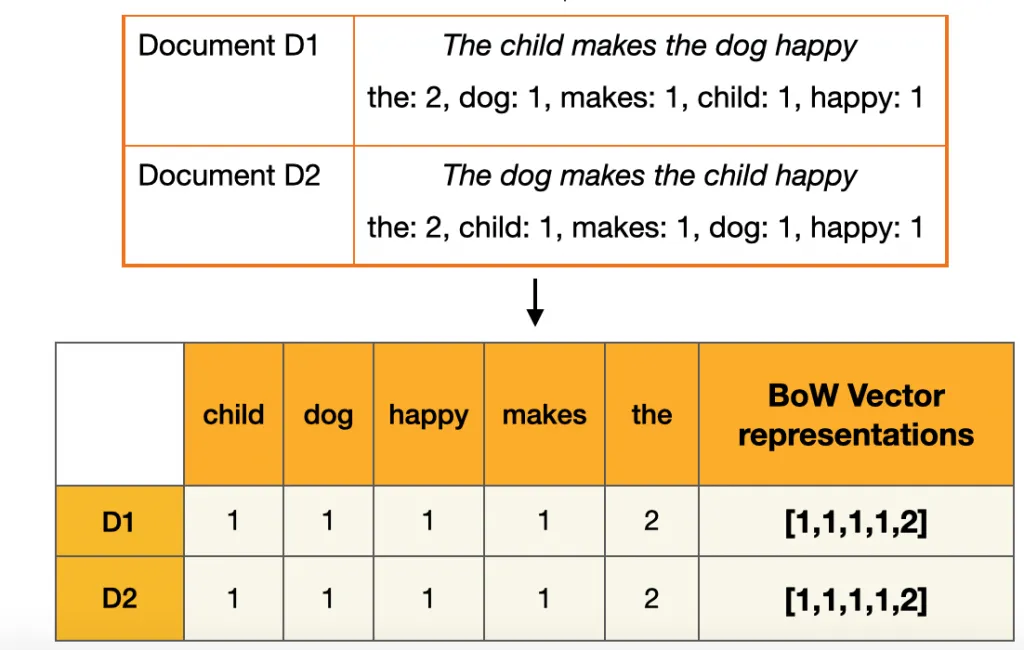

TF-IDF (Term Frequency-Inverse Document Frequency), bir kelimenin bir belgede ne kadar önemli olduğunu belirleyen bir metin temsil yöntemidir. TF, kelimenin bir belgede ne sıklıkta geçtiğini ifade ederken, IDF, kelimenin tüm belgeler arasında ne kadar nadir olduğunu ölçer. Bu sayede sık geçen yaygın kelimelere daha düşük, nadir ancak belirleyici olan kelimelere daha yüksek ağırlık verir.

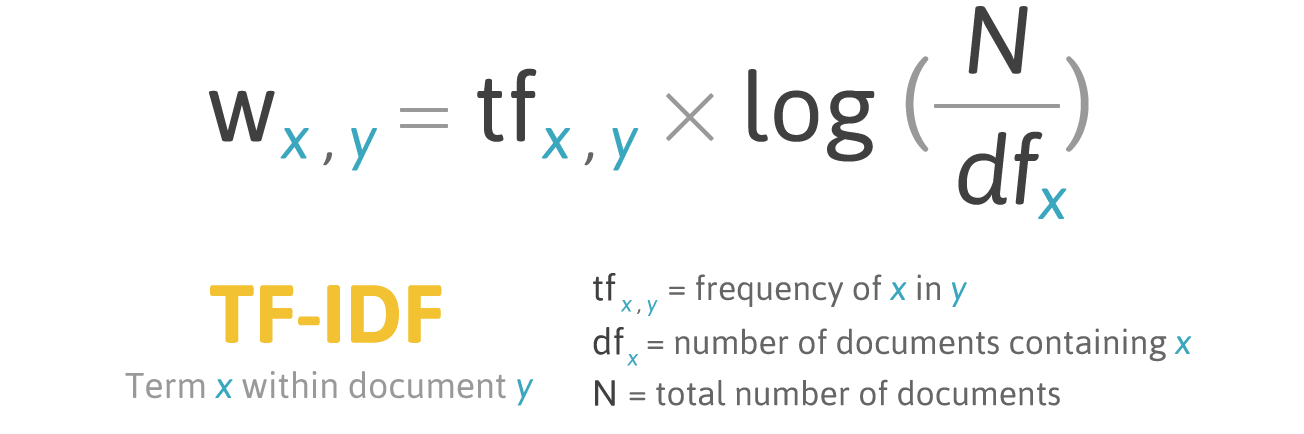

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metin dosyasından veri okuma
def derlemden_veri_okuma(dosya_adi):
    with open(dosya_adi, "r", encoding="utf-8") as file:
        veri = file.readlines()
    # İlk 10.000 cümleyi kullanma (hızlı çalışması için)
    veri = [satir.strip() for satir in veri[:10000]]  # 10,000 örnek cümleyle sınırlandırıldı
    return veri

# Dosya adını belirtin (örneğin "derlem.txt")
dosya_adi = "dosyalar//odtu_derlemi.txt"

# Derlemden veri okuma
veri = derlemden_veri_okuma(dosya_adi)

# Bag-of-Words Modeli
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(veri)

# BoW vektörlerini gösterme
print("Bag-of-Words Vektörleri:")
print(pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out()).head())

# TF-IDF Modeli
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(veri)

# TF-IDF vektörlerini gösterme
print("\nTF-IDF Vektörleri:")
print(pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out()).head())


Cümle bazında vektörleştirme uyguladığımız için cümlelerin benzerliklerini hesaplayabiliriz:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Kullanıcıdan sağlanan cümle
yeni_cumle = ["söğüt ağaç yağmur"]

# Yeni cümleyi vektörleştirme
yeni_cumle_vect = vectorizer_bow.transform(yeni_cumle)

# Yeni cümle ile tüm cümleler arasındaki benzerlikleri hesaplama
benzerlikler = cosine_similarity(yeni_cumle_vect, X_bow).flatten()

# En benzer 10 cümleyi bulma
en_benzer_indices = benzerlikler.argsort()[-10:][::-1]  # En yüksek benzerlikten başlayarak sıralar

# En benzer cümleleri ve benzerliklerini gösterme
print(f"'{yeni_cumle[0]}' cümlesine en yakın 10 cümle (BoW ile):")
for idx in en_benzer_indices:
    if benzerlikler[idx] > 0:
        print(f"Cümle: '{veri[idx]}' - Benzerlik: {benzerlikler[idx]:.2f}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF vektörleştirme
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(veri)

# Kullanıcıdan sağlanan cümle
yeni_cumle = ["söğüt ağaç yağmur"]

# Yeni cümleyi TF-IDF ile vektörleştirme
yeni_cumle_vect = vectorizer_tfidf.transform(yeni_cumle)

# Yeni cümle ile tüm cümleler arasındaki benzerlikleri hesaplama
benzerlikler = cosine_similarity(yeni_cumle_vect, X_tfidf).flatten()

# En benzer 10 cümleyi bulma
en_benzer_indices = benzerlikler.argsort()[-10:][::-1]  # En yüksek benzerlikten başlayarak sıralar

# En benzer cümleleri ve benzerliklerini gösterme
print(f"'{yeni_cumle[0]}' cümlesine en yakın 10 cümle (TF-IDF ile):")
for idx in en_benzer_indices:
    if benzerlikler[idx] > 0:
        print(f"Cümle: '{veri[idx]}' - Benzerlik: {benzerlikler[idx]:.2f}")


Cümle benzerliklerini hesaplamada özellikle BoW modelinin çok başarılı olmadığını görüyoruz. Başarıyı artırmak için hesaplama birimi olarak kelimeleri değil gövdeleri ele alalım.

In [ ]:
!pip install TurkishStemmer

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from TurkishStemmer import TurkishStemmer
import re

# TurkishStemmer kullanarak gövdeleme
stemmer = TurkishStemmer()

# Noktalama işaretlerinden temizleme ve küçük harfe çevirme fonksiyonu
def temizle(metin):
    metin = metin.lower()  # Metni küçük harfe çevirir
    metin = re.sub(r'[^\w\s]', '', metin)  # Noktalama işaretlerini kaldırır
    return metin

# Gövdeleme fonksiyonu
def turkce_govdeleme(metin):
    kelimeler = metin.split()
    govdeler = [stemmer.stem(kelime) for kelime in kelimeler]
    return ' '.join(govdeler)

# Metin dosyasından veri okuma, temizleme ve gövdeleme uygulama
def derlemden_veri_okuma(dosya_adi):
    with open(dosya_adi, "r", encoding="utf-8") as file:
        veri = file.readlines()
    # İlk 10.000 cümleyi kullanma (hızlı çalışması için)
    orijinal_veri = [temizle(satir.strip()) for satir in veri[:10000]]  # Temizlenmiş orijinal metinler
    govdeli_veri = [turkce_govdeleme(satir) for satir in orijinal_veri]  # Gövdeleme uygulandı
    return orijinal_veri, govdeli_veri

# Dosya adını belirtin (örneğin "odtu_derlemi.txt")
dosya_adi = "dosyalar//odtu_derlemi.txt"

# Derlemden veri okuma, temizleme ve gövdeleme uygulama
orijinal_veri, govdeli_veri = derlemden_veri_okuma(dosya_adi)

# TF-IDF Modeli
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(govdeli_veri)

# Bag-of-Words Modeli
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(govdeli_veri)

# Kullanıcıdan sağlanan cümle
yeni_cumle = ["söğüt ağaç yağmur"]

# Yeni cümleyi temizleme ve gövdeleme uygulama
yeni_cumle_temiz = temizle(yeni_cumle[0])
yeni_cumle_govdeli = [turkce_govdeleme(yeni_cumle_temiz)]

# Yeni cümleyi TF-IDF ile vektörleştirme
yeni_cumle_tfidf = vectorizer_tfidf.transform(yeni_cumle_govdeli)

# Yeni cümleyi Bag-of-Words ile vektörleştirme
yeni_cumle_bow = vectorizer_bow.transform(yeni_cumle_govdeli)

# Yeni cümle ile tüm cümleler arasındaki benzerlikleri hesaplama (TF-IDF)
benzerlikler_tfidf = cosine_similarity(yeni_cumle_tfidf, X_tfidf).flatten()

# Yeni cümle ile tüm cümleler arasındaki benzerlikleri hesaplama (BoW)
benzerlikler_bow = cosine_similarity(yeni_cumle_bow, X_bow).flatten()

# En benzer 10 cümleyi bulma (TF-IDF)
en_benzer_indices_tfidf = benzerlikler_tfidf.argsort()[-10:][::-1]  # En yüksek benzerlikten başlayarak sıralar

# En benzer 10 cümleyi bulma (BoW)
en_benzer_indices_bow = benzerlikler_bow.argsort()[-10:][::-1]  # En yüksek benzerlikten başlayarak sıralar

# En benzer cümleleri ve benzerliklerini orijinal metinlerle gösterme (BoW)
print(f"'{yeni_cumle[0]}' cümlesine en yakın 10 cümle (BoW ve TurkishStemmer ile Gövdeleme):")
for idx in en_benzer_indices_bow:
    if benzerlikler_bow[idx] > 0:
        print(f"Cümle: '{orijinal_veri[idx]}' - Benzerlik: {benzerlikler_bow[idx]:.2f}")
        
print("\n" + "="*50 + "\n")
        
# En benzer cümleleri ve benzerliklerini orijinal metinlerle gösterme (TF-IDF)
print(f"'{yeni_cumle[0]}' cümlesine en yakın 10 cümle (TF-IDF ve TurkishStemmer ile Gövdeleme):")
for idx in en_benzer_indices_tfidf:
    if benzerlikler_tfidf[idx] > 0:
        print(f"Cümle: '{orijinal_veri[idx]}' - Benzerlik: {benzerlikler_tfidf[idx]:.2f}")


Information Retrieval

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from TurkishStemmer import TurkishStemmer
import re

# TurkishStemmer kullanarak gövdeleme
stemmer = TurkishStemmer()

# Metni temizleme fonksiyonu (lowercase ve noktalama işaretlerinden arındırma)
def temizle(metin):
    metin = metin.lower()  # Küçük harfe çevirme
    metin = re.sub(r'[^\w\s]', '', metin)  # Noktalama işaretlerini kaldırma
    return metin

# Gövdeleme fonksiyonu
def turkce_govdeleme(metin):
    kelimeler = metin.split()
    govdeler = [stemmer.stem(kelime) for kelime in kelimeler]
    return ' '.join(govdeler)

# Klasördeki metin dosyalarını oku ve temizle
def dosyalari_oku_ve_temizle(klasor_adi):
    dosyalar = os.listdir(klasor_adi)
    metinler = []
    dosya_adlari = []
    for dosya in dosyalar:
        dosya_yolu = os.path.join(klasor_adi, dosya)
        with open(dosya_yolu, "r", encoding="utf-8") as f:
            metin = f.read()
            temiz_metin = temizle(metin)
            govdeli_metin = turkce_govdeleme(temiz_metin)
            metinler.append(govdeli_metin)
            dosya_adlari.append(dosya)
    return metinler, dosya_adlari

# Klasör adı
klasor_adi = "dosyalar//haberler"

# Klasördeki metin dosyalarını oku ve temizle
metinler, dosya_adlari = dosyalari_oku_ve_temizle(klasor_adi)

# TF-IDF ile metin dosyalarını vektörleştirme
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(metinler)

# Kullanıcıdan arama sorgusu al
arama_sorgusu = input("Arama yapmak istediğiniz cümleyi girin: ")

# Arama sorgusunu temizle ve gövdelenmiş hale getir
arama_sorgusu_temiz = temizle(arama_sorgusu)
arama_sorgusu_govdeli = [turkce_govdeleme(arama_sorgusu_temiz)]

# Arama sorgusunu TF-IDF ile vektörleştirme
arama_sorgusu_vect = vectorizer_tfidf.transform(arama_sorgusu_govdeli)

# Arama sorgusu ile dosyalar arasındaki benzerlikleri hesaplama
benzerlikler = cosine_similarity(arama_sorgusu_vect, X_tfidf).flatten()

# Benzerliklere göre en iyi eşleşen dosyaları bulma ve sıralama
en_benzer_indices = benzerlikler.argsort()[-5:][::-1]  # En yüksek benzerlikten başlayarak sıralar

# En benzer dosyaları ve benzerlik oranlarını gösterme
print(f"'{arama_sorgusu}' arama sorgusuna en yakın dosyalar:")
for idx in en_benzer_indices:
    if benzerlikler[idx] > 0:
        print(f"Dosya: '{dosya_adlari[idx]}' - Benzerlik: {benzerlikler[idx]:.2f}")

BoW ile sözcük bulutu oluşturma

In [ ]:
!pip install wordcloud

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Türkçe durdurma kelimeleri listesi
turkish_stop_words = [
    've', 'bu', 'da', 'de', 'bir', 'ile', 'için', 'ise', 'olan', 'gibi', 'en', 'bütün', 'olarak', 'diye', 'ben', 'sen',
    'nın', 'nin', 'ın', 'in', 'büyük', 'nasıl', 'bile', 'başka', 'önce', 'değil', 'şu', 'var', 'ya', 'göre',
    'çok', 'veya', 'fakat', 'ancak', 'çünkü', 'eğer', 'kadar', 'her', 'tüm', 'ama', 'ne', 'daha', 'sonra', 'ki'
]

# Derlemi dosyadan okuma
with open('dosyalar//odtu_derlemi.txt', 'r', encoding='utf-8') as file:
    corpus = file.readlines()

# BoW modeli ile kelime sayma (stop words filtreleme)
vectorizer = CountVectorizer(stop_words=turkish_stop_words)
X = vectorizer.fit_transform(corpus)

# Kelimelerin ve frekanslarının alınması
word_freq = np.asarray(X.sum(axis=0)).flatten()  # Bellek dostu sıklık hesaplaması
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_freq))

# Kelime bulutu oluşturma
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Kelime bulutunu görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sözcük bulutunu daha kaliteli hale getirmek için gövdeleme uygulayalım ve durak sözcükler listesini genişletelim.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from TurkishStemmer import TurkishStemmer

# Gövdeleme için TurkishStemmer örneği oluşturma
stemmer = TurkishStemmer()

# Derlemi dosyadan okuma
with open('dosyalar//odtu_derlemi.txt', 'r', encoding='utf-8') as file:
    corpus = file.readlines()

# Gövdeleme uygulama
stemmed_corpus = [' '.join([stemmer.stem(word) for word in doc.split()]) for doc in corpus]

# Türkçe durdurma kelimeleri listesi
turkish_stop_words = [
    # Bağlaçlar
    've', 'veya', 'ya', 'ile', 'de', 'da', 'fakat', 'ama', 'ancak', 'çünkü', 'halbuki', 
    'lakin', 'zira', 'eğer', 'şayet', 'ki', 'sonra', 'yani', 'hem', 'ya da', 'hatta', 
    'yalnız', 'dahi', 'oysa', 'oysa ki', 'oysa da', 'nitekim', 'sanki', 'bir yandan', 
    'diğer yandan', 'ne var ki', 'belki', 'gerçi',

    # Edatlar
    'için', 'kadar', 'gibi', 'göre', 'üzere', 'doğru', 'karşı', 'rağmen', 'yanında', 
    'önce', 'sonra', 'değil', 'beraber', 'arasında', 'birlikte', 'dolayı', 'yüzünden', 
    'üzerine', 'hakkında', 'dair', 'mı', 'mi', 'mu', 'mü',

    # Zamirler
    'ben', 'sen', 'o', 'biz', 'siz', 'onlar', 'bu', 'şu', 'o', 'bunu', 'şunu', 'onu', 
    'buna', 'şuna', 'ona', 'benim', 'senin', 'onun', 'bizim', 'sizin', 'onların', 'benden', 
    'senden', 'ondan', 'bizden', 'sizden', 'onlardan', 'beni', 'seni', 'onu', 'bizi', 
    'sizi', 'onları', 'kendim', 'kendin', 'kendi', 'kendimiz', 'kendiniz', 'kendileri', 
    'kimi', 'kimi zaman', 'bazı', 'bir', 'birkaç', 'herkes', 'herhangi', 'hiçkimse', 
    'kimse', 'bazısı', 'birisi', 'birkaçı',

    # Sayılar
    'bir', 'iki', 'üç', 'dört', 'beş', 'altı', 'yedi', 'sekiz', 'dokuz', 'on', 'yirmi', 
    'otuz', 'kırk', 'elli', 'altmış', 'yetmiş', 'seksen', 'doksan', 'yüz', 'bin', 
    'milyon', 'milyar', 'birinci', 'ikinci', 'üçüncü', 'dördüncü', 'beşinci', 
    'altıncı', 'yedinci', 'sekizinci', 'dokuzuncu', 'onuncu', 'ilk', 'son', 'kaç', 
    'kaçıncı', 'her', 'hepsi',

    # Kısaltmalar ve yaygın ifadeler
    'vb', 'vs', 'ör', 'örn', 'örneğin', 'gibi', 'mü', 'mi', 'mı', 'mu', 'bile', 
    'ancak', 'falan', 'filan', 'dahi', 'sadece', 'yalnız', 'yani', 'ise', 'aynı', 
    'daha', 'en', 'bazı', 'herhangi', 'her şey', 'şey', 'şunlar', 'bunlar', 'onlar', 
    'şöyle', 'böyle', 'neyse', 'neyse ki', 'çok', 'az', 'birçok', 'birkaçı', 'hemen', 
    'her', 'hep', 'tam', 'tüm', 'bütün', 'genel', 'aslında', 'çoğu', 'çoğunlukla'
]

# BoW modeli ile kelime sayma (stop words filtreleme)
vectorizer = CountVectorizer(stop_words=turkish_stop_words)
X = vectorizer.fit_transform(stemmed_corpus)

# Kelimelerin ve frekanslarının alınması
word_freq = np.asarray(X.sum(axis=0)).flatten()  # Bellek dostu sıklık hesaplaması
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_freq))

# Kelime bulutu oluşturma
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Kelime bulutunu görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()